C:\Users\epintos\AppData\Local\Julia-0.3.6

In [1]:
"""
We are now initializing the arrays outside the main function 
(this change gives a 40% increase in speed in 0.38, and around 10% 0.4)
eventually, the size of the arrays will be a function of the value of f
"""

function initialize_arrays()
    TP = zeros(Int16, 8000000);
    PTP1 = zeros(Int16, 5000000);
    PTP2 = zeros(Int16, 5000000);
    RTP = zeros(Int16, 3000000);
    D = zeros(Int16, 1000);
    R = zeros(Int16, 200)
    return TP, PTP1, PTP2, RTP, D, R
end

initialize_arrays (generic function with 1 method)

In [2]:
function MCRAFTd(f,tfinal,TP,PTP1,PTP2,RTP,D,R)

    M0=5.0
    I0 = 7.5e-3;
    CTA0 = 1.0e-2;
    Avogadro = 6.022141986e23;
    Avogadrof = Avogadro * f;
    t_f = tfinal;
        
    n_mon = floor(Integer, M0*Avogadrof);
    nmon_inic = n_mon;
    n_ini = floor(Integer, I0*Avogadrof);
    nini_inic = n_ini;
    n_cta = floor(Integer, CTA0*Avogadrof);
    ncta_inic = n_cta;
    
    n_rad = 0.0;
    n_istar=0.0;
    n_rstar=0.0;
    n_raft1=0.0;
    n_raft2=0.0;
    n_pol = 0.0;
    n_nothing=0;

    t_r = 0.0;

    """
    #reaction counters... these are not needed anymore. We used them to identify the most common reaction
    contadorR1 = 0;
    contadorR2 = 0;
    contadorR3 = 0;
    contadorR4 = 0;
    contadorR5 = 0;
    contadorR6 = 0;
    contadorR7 = 0;
    contadorR8 = 0;
    contadorR9 = 0;
    contadorR10 = 0;
    contadorR11 = 0;
    contadorR12 = 0;
    contadorR13 = 0;
    contadorR14 = 0;
    """
    #These might not be needed anymore, I have to check if findlast() works and if its faster.
    last_D = 1;
    last_R = 1;
    last_TP = 1;
    last_RTP = 1;
    last_PTP = 1;

    #This was used to print results every 0.1 hrs of reaction time, not really needed anymore.
    t_print=0.1;

    """
    These kinetic constants can be outside the loop, *only* because for this particular reaction
    the temperature and pressure remain constant. Otherwise they go inside the loop.
    """

    eff=0.5;
    kd=0.036;
    kp=3600000/Avogadrof;
    ki=kp; #assumed
    ktd=3.6e10/Avogadrof;
    ktc=3.6e10/Avogadrof;
    ka=3.6e9/Avogadrof;
    kf=36.0;
    
    #Both, maxlong and iter were used for debugging only.
    #maxlong=[0,0,0,0,0,0]
    iter=0
    
    """
    These are also outside of the loop now, because we need to initialize them.
    We are now updating the value inside each reaction simulation (there was no need to update ALL of them
    in every iteration)
    There might be a better way to do this...
    """
    
    R1 = kd*n_ini;
    R2 = ki*n_mon*n_istar;
    R3 = kp*n_mon*n_rad;
    R4 = ka*n_cta*n_rad;
    R5 = ka*n_istar*n_raft1;
    R6 = 0.5*kf*n_rstar; # 0.5 goes because n_rstar fragments with .5 chance to R6 and .5 to R7
    R7 = 0.5*kf*n_rstar; # same as R6
    R8 = 0.0; #since we decided reactions 8 and 10 won't be simulated, they can be erased I think
    R9 = ka*n_rad*n_raft1;
    R10 = 0.0; # same as R8
    R11 = 0.5*kf*n_raft2; # same as R6
    R12 = 0.5*kf*n_raft2; # same as R6
    R13 = ktc*n_rad*(n_rad-1); #
    R14 = ktd*n_rad*(n_rad-1); #


    #MC Loop begins here
    while t_r < t_f
        """
        This is the reaction selection block.
        I'm sure there's a better way to do this... The way it is, it works but it's not clean.
        Also, for more complex reaction sets we might need to improve it anyway.
        """
        R_t = R1+R2+R3+R4+R5+R6+R7+R8+R9+R10+R11+R12+R13+R14;

        r2 = rand();

        if r2 > (R1+R2+R3+R4)/(R_t)
            reacselec = 5;
            if r2 > (R1+R2+R3+R4+R5)/(R_t)
                reacselec = 6;
                if r2 > (R1+R2+R3+R4+R5+R6)/(R_t)
                    reacselec = 7;
                    #if r2 > (R1+R2+R3+R4+R5+R6+R7)/(R_t)
                        #reacselec = 8;
                        if r2 > (R1+R2+R3+R4+R5+R6+R7+R8)/(R_t)
                            reacselec = 9;
                            #if r2 > (R1+R2+R3+R4+R5+R6+R7+R8+R9)/(R_t)
                                #reacselec = 10;
                                if r2 > (R1+R2+R3+R4+R5+R6+R7+R8+R9+R10)/(R_t)
                                    reacselec = 11;
                                    if r2 > (R1+R2+R3+R4+R5+R6+R7+R8+R9+R10+R11)/(R_t)
                                        reacselec = 12;
                                        if r2 > (R1+R2+R3+R4+R5+R6+R7+R8+R9+R10+R11+R12)/(R_t)
                                            reacselec = 13;
                                            if r2 > (R1+R2+R3+R4+R5+R6+R7+R8+R9+R10+R11+R12+R13)/(R_t)
                                                reacselec = 14;
                                            end
                                        end
                                    end
                                end
                            #end
                        end

                    #end
                end
            end
        elseif r2 > (R1+R2)/(R_t)
            reacselec = 3;
            if r2 > (R1+R2+R3)/(R_t)
                reacselec = 4;
            end
            elseif r2 < R1/(R_t) #Careful, I inverted the inequality here and the reactions too
            reacselec = 1;
        else
            reacselec = 2;
        end


        #time update.
        t_r = t_r + (-log(rand()))/(R_t);

        """
        Simulation of each reaction:
        Once the reaction was selected, we do 4 things in the worst case scenario:
        1. update the number of molecules
        2. randomly choose which molecule will react (this is now done with O(k) at expenses of big arrays)
        3. update the arrays accordingly
        4. update the reaction rates
        """
        if reacselec == 1
            #contadorR1 = contadorR1 + 1;
            
            n_ini = n_ini - 1;
            
            if rand() <= eff
                n_istar = n_istar + 2;
                R2 = ki*n_mon*n_istar;
                R5 = ka*n_istar*n_raft1;
            else
                n_nothing = n_nothing + 2;
            end

            R1 = kd*n_ini;                   


        elseif reacselec == 2
            #contadorR2 = contadorR2 + 1;
            
            n_istar = n_istar - 1;
            n_mon = n_mon - 1;
            n_rad = n_rad + 1;

            @inbounds R[last_R] = 1;
            last_R = last_R + 1;

            R2 = ki*n_mon*n_istar;
            R3 = kp*n_mon*n_rad;
            R4 = ka*n_cta*n_rad;
            R5 = ka*n_istar*n_raft1;
            R9 = ka*n_rad*n_raft1;  
            R13 = 0.5*ktc*n_rad*(n_rad-1);
            R14 = 0.5*ktd*n_rad*(n_rad-1);


        elseif reacselec == 3
            #contadorR3 = contadorR3 + 1;
            
            Rselec = ceil(Integer, n_rad*rand());

            n_mon = n_mon - 1;

            @inbounds R[Rselec] += 1;

            R2 = ki*n_mon*n_istar;
            R3 = kp*n_mon*n_rad;


        elseif reacselec == 4
            #contadorR4 = contadorR4 + 1;

            Rselec = ceil(Integer, n_rad*rand());

            n_rad = n_rad - 1;
            n_cta = n_cta - 1;
            n_rstar = n_rstar + 1;

            @inbounds RTP[last_RTP] = R[Rselec];
            last_RTP = last_RTP + 1;

            @inbounds R[Rselec] = R[last_R-1];
            @inbounds R[last_R-1] = 0;
            last_R = last_R - 1;

            R3 = kp*n_mon*n_rad;
            R4 = ka*n_cta*n_rad;
            R6 = 0.5*kf*n_rstar;
            R7 = 0.5*kf*n_rstar;
            R9 = ka*n_rad*n_raft1;
            R13 = 0.5*ktc*n_rad*(n_rad-1);
            R14 = 0.5*ktd*n_rad*(n_rad-1);

        elseif reacselec == 5
            #contadorR5 = contadorR5 + 1;

            TPselec = ceil(Integer, n_raft1*rand());

            n_istar = n_istar - 1;
            n_raft1 = n_raft1 - 1;
            n_rstar = n_rstar + 1;

            @inbounds RTP[last_RTP] = TP[TPselec];
            last_RTP = last_RTP + 1;

            @inbounds TP[TPselec] = TP[last_TP-1];
            @inbounds TP[last_TP-1] = 0;
            last_TP = last_TP - 1;

            R2 = ki*n_mon*n_istar;
            R5 = ka*n_istar*n_raft1;
            R6 = 0.5*kf*n_rstar;
            R7 = 0.5*kf*n_rstar;
            R9 = ka*n_rad*n_raft1;                    

        elseif reacselec == 6
           #contadorR6 = contadorR6 + 1;

            RTP_selec = ceil(Integer, n_rstar*rand());

            n_rstar = n_rstar - 1;
            n_rad = n_rad + 1;
            n_cta = n_cta + 1;

            @inbounds R[last_R] = RTP[RTP_selec];
            last_R = last_R + 1;

            @inbounds RTP[RTP_selec] = RTP[last_RTP-1];
            @inbounds RTP[last_RTP-1] = 0;
            last_RTP = last_RTP - 1;

            R3 = kp*n_mon*n_rad;
            R4 = ka*n_cta*n_rad;
            R6 = 0.5*kf*n_rstar;
            R7 = 0.5*kf*n_rstar;
            R9 = ka*n_rad*n_raft1;
            R13 = 0.5*ktc*n_rad*(n_rad-1);
            R14 = 0.5*ktd*n_rad*(n_rad-1);

        elseif reacselec == 7 #preeq 4 - fragmentaciÃ³n 2
            #contadorR7 = contadorR7 + 1;

            RTP_selec = ceil(Integer, n_rstar*rand());

            n_rstar = n_rstar - 1;
            n_istar = n_istar + 1;
            n_raft1 = n_raft1 + 1;

            @inbounds TP[last_TP] = RTP[RTP_selec];
            last_TP = last_TP + 1;

            @inbounds RTP[RTP_selec] = RTP[last_RTP-1];
            @inbounds RTP[last_RTP-1] = 0;
            last_RTP = last_RTP - 1;

            R2 = ki*n_mon*n_istar;
            R5 = ka*n_istar*n_raft1;
            R6 = 0.5*kf*n_rstar;
            R7 = 0.5*kf*n_rstar;
            R9 = ka*n_rad*n_raft1;

        elseif reacselec == 8 #reiniciacion y propagacion del rstar liberado por cta
            #contadorR8 = contadorR8 + 1;
            
            
        elseif reacselec == 9 #core eq - adicion 1
            #contadorR9 = contadorR9 + 1;

            Rselec = ceil(Integer, n_rad*rand());
            TPselec = ceil(Integer, n_raft1*rand());

            n_rad = n_rad - 1;
            n_raft1 = n_raft1 - 1;
            n_raft2 = n_raft2 + 1;

            @inbounds PTP1[last_PTP] = R[Rselec];
            @inbounds PTP2[last_PTP] = TP[TPselec];
            last_PTP = last_PTP + 1;

            @inbounds R[Rselec] = R[last_R-1];
            @inbounds R[last_R-1] = 0;
            last_R = last_R - 1;

            @inbounds TP[TPselec] = TP[last_TP-1];
            @inbounds TP[last_TP-1] = 0;
            last_TP = last_TP - 1;

            R3 = kp*n_mon*n_rad;
            R4 = ka*n_cta*n_rad;
            R5 = ka*n_istar*n_raft1;
            R9 = ka*n_rad*n_raft1;
            R11 = 0.5*kf*n_raft2;
            R12 = 0.5*kf*n_raft2;
            R13 = 0.5*ktc*n_rad*(n_rad-1);
            R14 = 0.5*ktd*n_rad*(n_rad-1);

        elseif reacselec == 10
            #contadorR10 = contadorR10 + 1;

        elseif reacselec == 11
            #contadorR11 = contadorR11 + 1;

            PTPselec = ceil(Integer, n_raft2*rand());

            n_raft2 = n_raft2 - 1;
            n_rad = n_rad + 1;
            n_raft1 = n_raft1 + 1;

            @inbounds R[last_R] = PTP1[PTPselec];
            @inbounds TP[last_TP] = PTP2[PTPselec];

            @inbounds PTP1[PTPselec]=PTP1[last_PTP-1];
            @inbounds PTP2[PTPselec]=PTP2[last_PTP-1];
            @inbounds PTP1[last_PTP-1] = 0;
            @inbounds PTP2[last_PTP-1] = 0;
            last_PTP = last_PTP - 1;

            last_R = last_R + 1;
            last_TP = last_TP + 1;

            R3 = kp*n_mon*n_rad;
            R4 = ka*n_cta*n_rad;
            R5 = ka*n_istar*n_raft1;
            R9 = ka*n_rad*n_raft1;
            R11 = 0.5*kf*n_raft2;
            R12 = 0.5*kf*n_raft2;
            R13 = 0.5*ktc*n_rad*(n_rad-1);
            R14 = 0.5*ktd*n_rad*(n_rad-1);

        elseif reacselec == 12
            #contadorR12 = contadorR12 + 1;

            PTPselec = ceil(Integer, n_raft2*rand());

            n_raft2 = n_raft2 - 1;
            n_rad = n_rad + 1;
            n_raft1 = n_raft1 + 1;

            @inbounds TP[last_TP] = PTP1[PTPselec];
            @inbounds R[last_R] = PTP2[PTPselec];

            @inbounds PTP1[PTPselec]=PTP1[last_PTP-1];
            @inbounds PTP2[PTPselec]=PTP2[last_PTP-1];
            @inbounds PTP1[last_PTP-1] = 0;
            @inbounds PTP2[last_PTP-1] = 0;
            last_PTP = last_PTP - 1;

            last_R = last_R + 1;
            last_TP = last_TP + 1;

            R3 = kp*n_mon*n_rad;
            R4 = ka*n_cta*n_rad;
            R5 = ka*n_istar*n_raft1;
            R9 = ka*n_rad*n_raft1;
            R11 = 0.5*kf*n_raft2;
            R12 = 0.5*kf*n_raft2;
            R13 = 0.5*ktc*n_rad*(n_rad-1);
            R14 = 0.5*ktd*n_rad*(n_rad-1);

        elseif reacselec == 13
            #contadorR13 = contadorR13 + 1;

            R1selec = ceil(Integer, rand()*(n_rad-1));
            R2selec = ceil(Integer, rand()*(n_rad-1));

            while R1selec == R2selec
              if n_rad != 2
                  R2selec = ceil(Integer, rand()*(n_rad-1));
              else
                  R2selec = 2;
              end
            end

            n_rad = n_rad - 2;
            n_pol = n_pol + 1;

            #@inbounds D[last_D] = R[R1selec] + R[R2selec];
            #last_D = last_D + 1;
            @inbounds D[R[R1selec]+R[R2selec]] += 1

            @inbounds R[R1selec] = R[last_R-1];
            @inbounds R[last_R-1] = 0;
            @inbounds R[R2selec] = R[last_R-2];
            @inbounds R[last_R-2] = 0;
            last_R = last_R - 2;

            R3 = kp*n_mon*n_rad;
            R4 = ka*n_cta*n_rad;
            R9 = ka*n_rad*n_raft1;
            R13 = 0.5*ktc*n_rad*(n_rad-1);
            R14 = 0.5*ktd*n_rad*(n_rad-1);

        elseif reacselec == 14
            #contadorR14 = contadorR14 + 1;

            R1selec = ceil(Integer, rand()*(n_rad-1));
            R2selec = ceil(Integer, rand()*(n_rad-1));

            while R1selec == R2selec
              if n_rad != 2
                  R2selec = ceil(Integer, rand()*(n_rad-1));
              else
                  R2selec = 2;
              end
            end

            n_rad = n_rad - 2;
            n_pol = n_pol + 2;

            @inbounds D[R[R1selec]] += 1
            @inbounds D[R[R2selec]] += 1
            
            """
            We changed the representation for D.
            """
            #@inbounds D[last_D] = R[R1selec];
            #@inbounds D[last_D] = R[R2selec];
            #last_D = last_D + 2;
            

            @inbounds R[R1selec] = R[last_R-1];
            @inbounds R[last_R-1] = 0;
            @inbounds R[R2selec] = R[last_R-2];
            @inbounds R[last_R-2] = 0;
            last_R = last_R - 2;

            R3 = kp*n_mon*n_rad;
            R4 = ka*n_cta*n_rad;
            R9 = ka*n_rad*n_raft1;
            R13 = 0.5*ktc*n_rad*(n_rad-1);
            R14 = 0.5*ktd*n_rad*(n_rad-1);

        end #if
        

"""
This is all debugging code
        
    if t_r > t_print;

        i+=1

        if t_r-t_print < 0.1
            t_print = t_print + 0.1;
        else
            t_print = t_r + 0.1;
        endint

        @inbounds X[i] = 100.0*(nmon_inic - n_mon)/(nmon_inic);
    end

     if n_pol > maxlong[1] #D
         maxlong[1]=n_pol
     end
     if n_rad>maxlong[2] #R
         maxlong[2]=n_rad
     end
     if n_istar>maxlong[3] #
         maxlong[3]=n_istar
     end
     if n_rstar>maxlong[4] #RTP
         maxlong[4]=n_rstar
     end
     if n_raft1>maxlong[5] #TP
         maxlong[5]=n_raft1
     end
     if n_raft2>maxlong[6] #PTP
         maxlong[6]=n_raft2
     end
"""        
        #iter += 1
        end #while

#counters = [contadorR1,contadorR2,contadorR3,contadorR4,contadorR5,contadorR6,contadorR7,contadorR8,contadorR9,contadorR10,contadorR11,contadorR12,contadorR13,contadorR14]       
conv = 100.0*(nmon_inic - n_mon)/(nmon_inic)
    
    #return everything for comparison purposes only. All postprocessing is done before plotting now.
    return D,PTP1,PTP2,TP,RTP,R,conv,iter

end #function

MCRAFTd (generic function with 1 method)

In [3]:
function removezeros(Vec)
    return Vec[1:find(Vec)[end]]
end

removezeros (generic function with 1 method)

In [4]:
#Testing for different values of f
F=[1e-18,1e-17,1e-16,2e-16,5e-16,1e-15,5e-15,1e-14]

8-element Array{Float64,1}:
 1.0e-18
 1.0e-17
 1.0e-16
 2.0e-16
 5.0e-16
 1.0e-15
 5.0e-15
 1.0e-14

In [6]:
TP,PTP1,PTP2,RTP,D,R = initialize_arrays()
@time D0,PTP10,PTP20,TP0,RTP0,R0,X0,maxlong0=MCRAFTd(1e-19,34,TP,PTP1,PTP2,RTP,D,R);

  49.635 milliseconds (15 allocations: 512 bytes)


In [8]:
TP,PTP1,PTP2,RTP,D,R = initialize_arrays()
@time D1,PTP11,PTP21,TP,RTP,R,X1,maxlong1=MCRAFTd(F[1],34,TP,PTP1,PTP2,RTP,D,R);

 426.566 milliseconds (16 allocations: 528 bytes)


In [9]:
TP,PTP1,PTP2,RTP,D,R = initialize_arrays()
@time D2,PTP12,PTP22,TP2,RTP2,R2,X2,maxlong2=MCRAFTd(F[2],34,TP,PTP1,PTP2,RTP,D,R); #4.8 secs --> 4.4 outside init;

   4.423 seconds      (24 allocations: 912 bytes)


In [10]:
TP,PTP1,PTP2,RTP,D,R = initialize_arrays()
@time D3,PTP13,PTP23,TP3,RTP3,R3,X3,maxlong3=MCRAFTd(F[3],34,TP,PTP1,PTP2,RTP,D,R); #48.8 secs --> 45.4 outside init;

  45.581 seconds      (24 allocations: 912 bytes)


In [13]:
TP,PTP1,PTP2,RTP,D,R = initialize_arrays()
@time D4,PTP14,PTP24,TP4,RTP4,R4,X4,maxlong4=MCRAFTd(F[4],34,TP,PTP1,PTP2,RTP,D,R); #106 secs --> 96 outside init;

  93.553 seconds      (24 allocations: 912 bytes)


In [14]:
TP,PTP1,PTP2,RTP,D,R = initialize_arrays()
@time D5,PTP15,PTP25,TP5,RTP5,R5,X5,maxlong5=MCRAFTd(F[5],34,TP,PTP1,PTP2,RTP,D,R); #554 (0.37) - 266 (0.4) - 254 (out init);

 252.241 seconds      (24 allocations: 912 bytes)


In [ ]:
TP,PTP1,PTP2,RTP,D,R = initialize_arrays()
@time D6,PTP16,PTP26,TP6,RTP6,R6,X6,maxlong6=MCRAFTd(1e-15,34,TP,PTP1,PTP2,RTP,D,R); #937 (0.37) - 559 (0.4) - 528 (out init);

In [ ]:
TP,PTP1,PTP2,RTP,D,R = initialize_arrays()
@time D7,PTP17,PTP27,TP7,RTP7,R7,X7,maxlong7=MCRAFTd(5e-15,34,TP,PTP1,PTP2,RTP,D,R); #4800 secs in 0.37, 3042 in 0.4;

In [ ]:
TP,PTP1,PTP2,RTP,D,R = initialize_arrays()
@time D8,PTP18,PTP28,TP8,RTP8,R8,X8,maxlong8=MCRAFTd(1e-14,34); #~10000 secs in 0.37, 6019 in 0.4

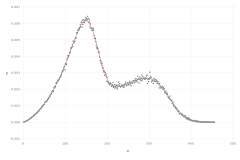

In [15]:
"""
ALL plots have the MWDw on the y axis now !!! unless specified.
This plots the discrete distribution and the LOESS smoothing in the same plot.
Should be made a function now...
"""
using Gadfly

D66=removezeros(D8)
D666=D666=((1:length(D66)).*D66;)./sum([1:length(D66);].*D66)

set_default_plot_size(24cm, 16cm)

plot(

layer(x=1:length(D666), y=D666, 
Geom.point,
Theme(default_point_size=0.6mm,default_color=color("black"))),

layer(x=1:length(D66), 
y=D666, Geom.smooth(method=:loess,smoothing=0.20), 
Theme(default_color=color("red")))

)

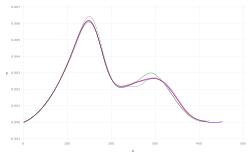

In [16]:
"""
This is just to do a quick compare, we know now that D1, D2 and D3 give horrible results. So we removed them for now.
"""

using Gadfly

   
D11=removezeros(D1)
    D111=((1:length(D11)).*D11;)./sum([1:length(D11)].*D11);

D22=removezeros(D2)
    D222=((1:length(D22)).*D22;)./sum([1:length(D22)].*D22);

D33=removezeros(D3)
    D333=((1:length(D33)).*D33;)./sum([1:length(D33)].*D33)

#D44=hist(D4[find(D4)],1000)[2];
D44=removezeros(D4)
    D444=((1:length(D44)).*D44;)./sum([1:length(D44)].*D44)

#D55=hist(D5[find(D5)],1000)[2];
D55=removezeros(D5)
    D555=((1:length(D55)).*D55;)./sum([1:length(D55)].*D55)

D66=removezeros(D6)
    D666=((1:length(D66)).*D66;)./sum([1:length(D66)].*D66)

D77=removezeros(D7)
    D777=((1:length(D77)).*D77;)./sum([1:length(D77)].*D77)

D88=removezeros(D8)
    D888=((1:length(D88)).*D88;)./sum([1:length(D88)].*D88)

set_default_plot_size(25cm, 16cm)

plot(

#layer(x=1:length(D111), 
#y=D111, Geom.smooth(method=:loess,smoothing=0.25), 
#Theme(default_color=color("red"))),

#layer(x=1:length(D222), 
#y=D222, Geom.smooth(method=:loess,smoothing=0.25), 
#Theme(default_color=color("blue"))),

#layer(x=1:length(D333), 
#y=D333, Geom.smooth(method=:loess,smoothing=0.25), 
#Theme(default_color=color("black"))),

layer(x=1:length(D444), 
y=D444, Geom.smooth(method=:loess,smoothing=0.25), 
Theme(default_color=color("grey"))),

layer(x=1:length(D555), 
y=D555, Geom.smooth(method=:loess,smoothing=0.25), 
Theme(default_color=color("green"))),

layer(x=1:length(D666), 
y=D666, Geom.smooth(method=:loess,smoothing=0.25), 
Theme(default_color=color("red"))),

layer(x=1:length(D777), 
y=D777, Geom.smooth(method=:loess,smoothing=0.25), 
Theme(default_color=color("blue"))),

layer(x=1:length(D888), 
y=D888, Geom.smooth(method=:loess,smoothing=0.25), 
Theme(default_color=color("magenta")))

)

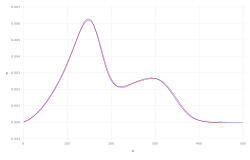

In [17]:
"""
Here we compare the deterministic solution with D7. It's pretty good, and there is no need to simulate D8.
This comparison should be ma de a function.
"""

D11=removezeros(D7)
    D111=((1:length(D11)).*D11;)./sum([1:length(D11)].*D11);

set_default_plot_size(25cm, 16cm)

plot(

layer(x=1:length(D111), 
y=D111, Geom.smooth(method=:loess,smoothing=0.25), 
Theme(default_color=color("red"))),

layer(x=1:length(gproms), 
y=gproms, Geom.line(), 
Theme(default_color=color("blue")))

)

In [20]:
"""
This is the function to compare a MC result with gproms.
"""

function comparewithgproms(V1,G1,tipo="both")
    #V1 es el vector a comparar, previo calculo de mwdw
    #G1 es el vector resultados de gproms
    #tipo = string options are: dots, line, both 
          
D11=removezeros(V1)
D111=((1:length(D11)).*D11;)./sum([1:length(D11);].*D11);

set_default_plot_size(24cm, 16cm)

if tipo == "both"   
    
p=plot(

layer(x=1:length(D111),y=D111,
    Geom.smooth(method=:loess,smoothing=0.25), 
    Theme(default_color=color("red"))),
    Guide.manual_color_key("",["Monte Carlo", "gProms"],["red", "blue"]),
    Guide.xticks(ticks=[0:100:500;]),Guide.yticks(ticks=[0:0.002:.008;]),
    Guide.ylabel("Chain length"), # label for y-axis
    Guide.xlabel("Weight fraction"),  # label for x-axis
    Guide.title(""),
    
layer(x=1:length(D111), y=D111, 
    Geom.point,
    Theme(default_point_size=0.6mm,default_color=color("red"))),
    
    
layer(x=1:length(gproms), 
    y=gproms, Geom.line(), 
    Theme(default_color=color("blue")))
)
        
elseif tipo == "dots"
        
p=plot(
   
layer(x=1:length(D111), y=D111, 
    Geom.point,
    Theme(default_point_size=0.6mm,default_color=color("red"))),
    Guide.manual_color_key("",["Monte Carlo", "gProms"],["red", "blue"]),
    Guide.xticks(ticks=[0:100:500;]),Guide.yticks(ticks=[0:0.002:.008;]),
    Guide.ylabel("Chain length"), # label for y-axis
    Guide.xlabel("Weight fraction"),  # label for x-axis
    Guide.title(""),
    
layer(x=1:length(gproms), 
    y=gproms, Geom.line(), 
    Theme(default_color=color("blue")))
)
        
elseif tipo == "line"
        
p=plot(

layer(x=1:length(D111),y=D111,
    Geom.smooth(method=:loess,smoothing=0.25), 
    Theme(default_color=color("red"))),
    Guide.manual_color_key("",["Monte Carlo", "gProms"],["red", "blue"]),
    Guide.xticks(ticks=[0:100:500;]),Guide.yticks(ticks=[0:0.002:.008;]),
    Guide.xlabel("Chain length"), # label for y-axis
    Guide.ylabel("Weight fraction"),  # label for x-axis
    Guide.title(""),
    
layer(x=1:length(gproms), 
    y=gproms, Geom.line(), 
    Theme(default_color=color("blue")))
)      
end        

return p
        
end

comparewithgproms (generic function with 2 methods)

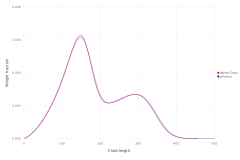

In [19]:
comparewithgproms(D8,gproms,"line")

In [ ]:
"""
All 3D graphs start here... this is not 0.4 ready. So it might not work.
Old plots are showing instead, for now...
"""
using PyPlot

In [21]:
PTP13hist=hist(PTP13[find(PTP13)],1000)[2];
X=((1:length(PTP13hist)).*PTP13hist;)./sum(PTP13hist);

PTP23hist=hist(PTP23[find(PTP23)],1000)[2];
Y=((1:length(PTP23hist)).*PTP23hist;)./sum(PTP23hist);

In [ ]:
maxValue=max(maximum(PTP13),maximum(PTP23))
PTP=zeros(Int16,maxValue,maxValue)
for k = 1:length(find(PTP13))
    PTP[PTP13[k],PTP23[k]]+=1
end
surf(PTP,rstride=1, cstride=1,linewidth=0, cmap=get_cmap(), antialiased=true)
PyPlot.xlim(0,400)
PyPlot.ylim(0,400)
PyPlot.zlim(0,500)

elapsed time: 6.331785612 seconds (308012056 bytes allocated, 2.51% gc time)


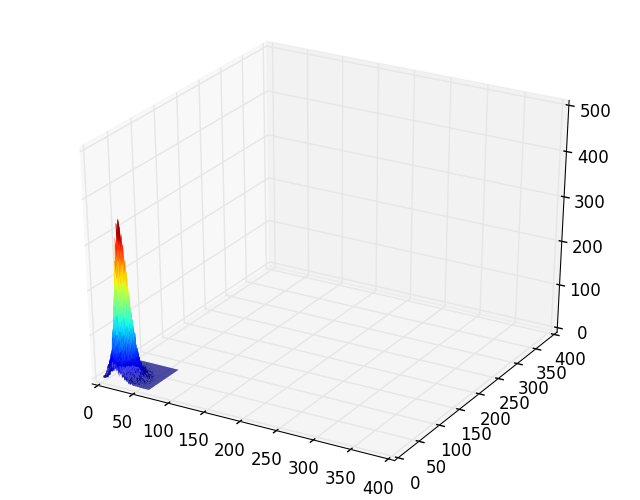

(0,500)

In [124]:
@time D3,PTP13,PTP23=MCRAFT(F[3],10);
maxValue=max(maximum(PTP13),maximum(PTP23))
PTP=zeros(Int16,maxValue,maxValue)
for k = 1:length(find(PTP13))
    PTP[PTP13[k],PTP23[k]]+=1
end
surf(PTP,rstride=1, cstride=1,linewidth=0, cmap=get_cmap(), antialiased=true)
PyPlot.xlim(0,400)
PyPlot.ylim(0,400)
PyPlot.zlim(0,500)

elapsed time: 13.536134444 seconds (308017896 bytes allocated, 1.12% gc time)


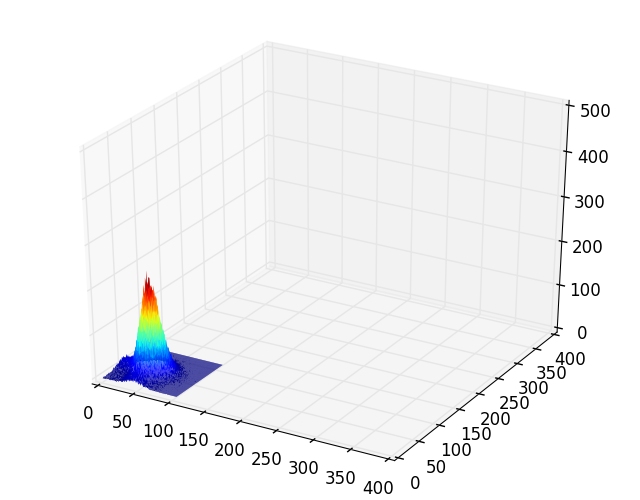

(0,500)

In [125]:
@time D3,PTP13,PTP23=MCRAFT(F[3],15);
maxValue=max(maximum(PTP13),maximum(PTP23))
PTP=zeros(Int16,maxValue,maxValue)
for k = 1:length(find(PTP13))
    PTP[PTP13[k],PTP23[k]]+=1
end
surf(PTP,rstride=1, cstride=1,linewidth=0, cmap=get_cmap(), antialiased=true)
PyPlot.xlim(0,400)
PyPlot.ylim(0,400)
PyPlot.zlim(0,500)

elapsed time: 22.689992755 seconds (308028744 bytes allocated, 0.73% gc time)


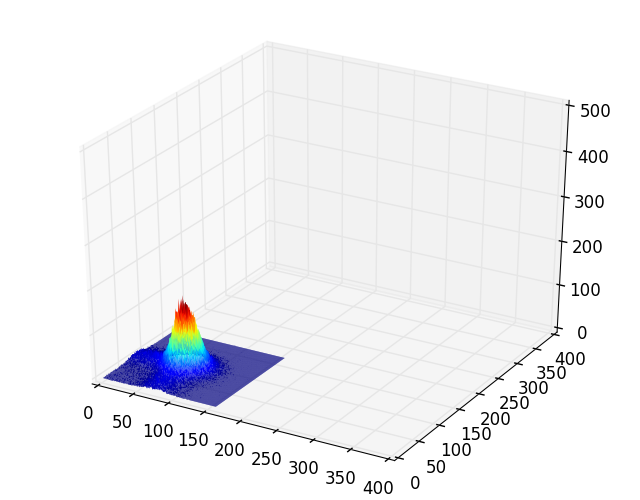

(0,500)

In [126]:
@time D3,PTP13,PTP23=MCRAFT(F[3],20);
maxValue=max(maximum(PTP13),maximum(PTP23))
PTP=zeros(Int16,maxValue,maxValue)
for k = 1:length(find(PTP13))
    PTP[PTP13[k],PTP23[k]]+=1
end
surf(PTP,rstride=1, cstride=1,linewidth=0, cmap=get_cmap(), antialiased=true)
PyPlot.xlim(0,400)
PyPlot.ylim(0,400)
PyPlot.zlim(0,500)

elapsed time: 46.571962718 seconds (308080920 bytes allocated, 0.31% gc time)


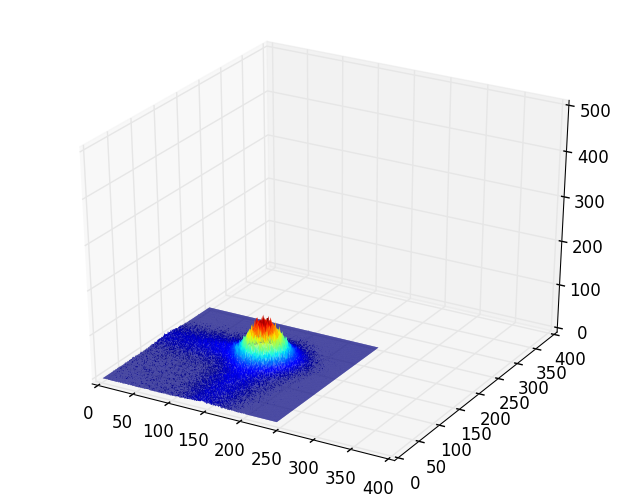

(0,500)

In [127]:
@time D3,PTP13,PTP23=MCRAFT(F[3],30);
maxValue=max(maximum(PTP13),maximum(PTP23))
PTP=zeros(Int16,maxValue,maxValue)
for k = 1:length(find(PTP13))
    PTP[PTP13[k],PTP23[k]]+=1
end
surf(PTP,rstride=1, cstride=1,linewidth=0, cmap=get_cmap(), antialiased=true)
PyPlot.xlim(0,400)
PyPlot.ylim(0,400)
PyPlot.zlim(0,500)

elapsed time: 72.005934547 seconds (308183464 bytes allocated, 0.23% gc time)


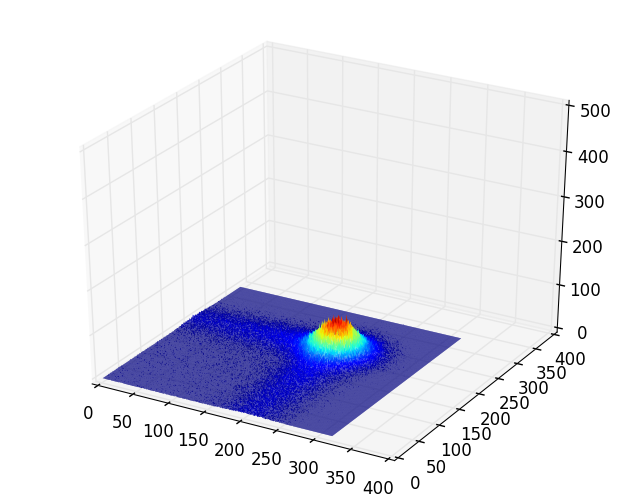

(0,500)

In [128]:
@time D3,PTP13,PTP23=MCRAFT(F[3],40);
maxValue=max(maximum(PTP13),maximum(PTP23))
PTP=zeros(Int16,maxValue,maxValue)
for k = 1:length(find(PTP13))
    PTP[PTP13[k],PTP23[k]]+=1
end
surf(PTP,rstride=1, cstride=1,linewidth=0, cmap=get_cmap(), antialiased=true)
PyPlot.xlim(0,400)
PyPlot.ylim(0,400)
PyPlot.zlim(0,500)

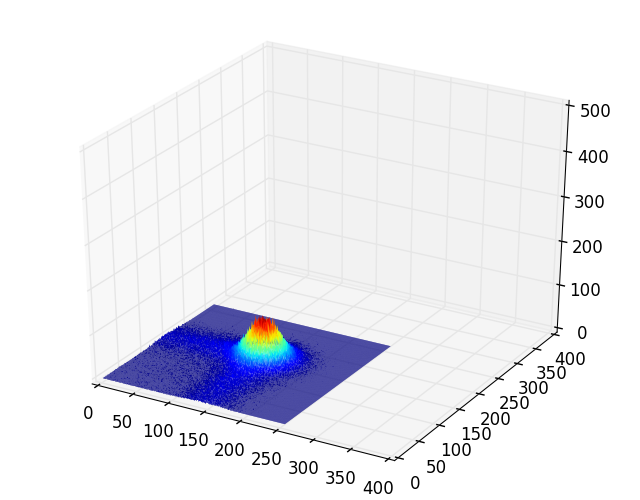

(0,500)

In [18]:
@time D3,PTP13,PTP23=MCRAFT(F[3],50);
maxValue=max(maximum(PTP13),maximum(PTP23))
PTP=zeros(Int16,maxValue,maxValue)
for k = 1:length(find(PTP13))
    PTP[PTP13[k],PTP23[k]]+=1
end
surf(PTP,rstride=1, cstride=1,linewidth=0, cmap=get_cmap(), antialiased=true)
PyPlot.xlim(0,400)
PyPlot.ylim(0,400)
PyPlot.zlim(0,500)

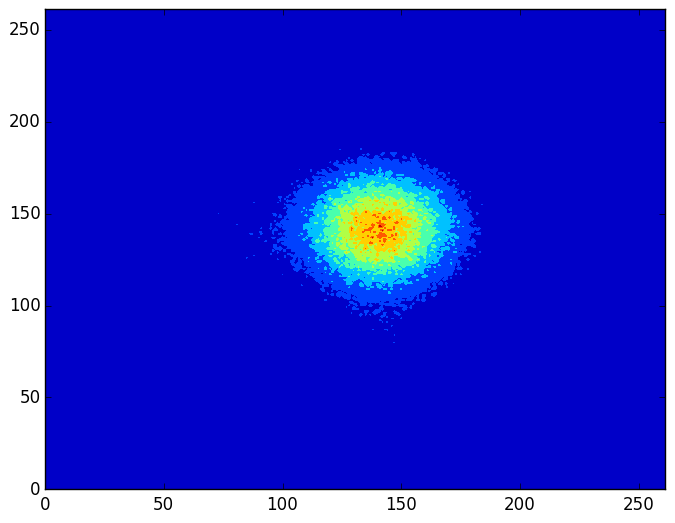

PyObject <matplotlib.contour.QuadContourSet instance at 0x00000000C863BBC8>

In [35]:
contourf(PTP, zdir="x")

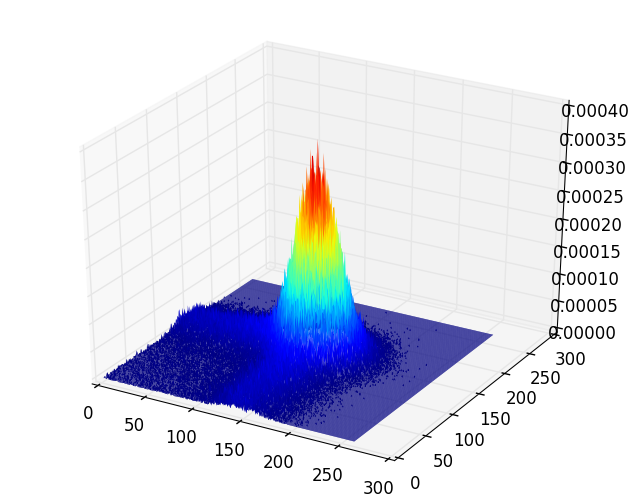

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000BA256FD0>

In [48]:
maxValue=max(maximum(PTP15),maximum(PTP25))
PTP=zeros(Int16,maxValue,maxValue)
for k = 1:length(find(PTP13))
    PTP[PTP13[k],PTP23[k]]+=1
end
surf(PTP/sum(PTP),rstride=1, cstride=1, linewidth=0, cmap=get_cmap(), antialiased=true)
#PyPlot.xlabel("xlabel", fontsize=6)
#PyPlot.ylabel("ylabel", fontsize=6)
#PyPlot.zlabel("ylabel", fontsize=6)

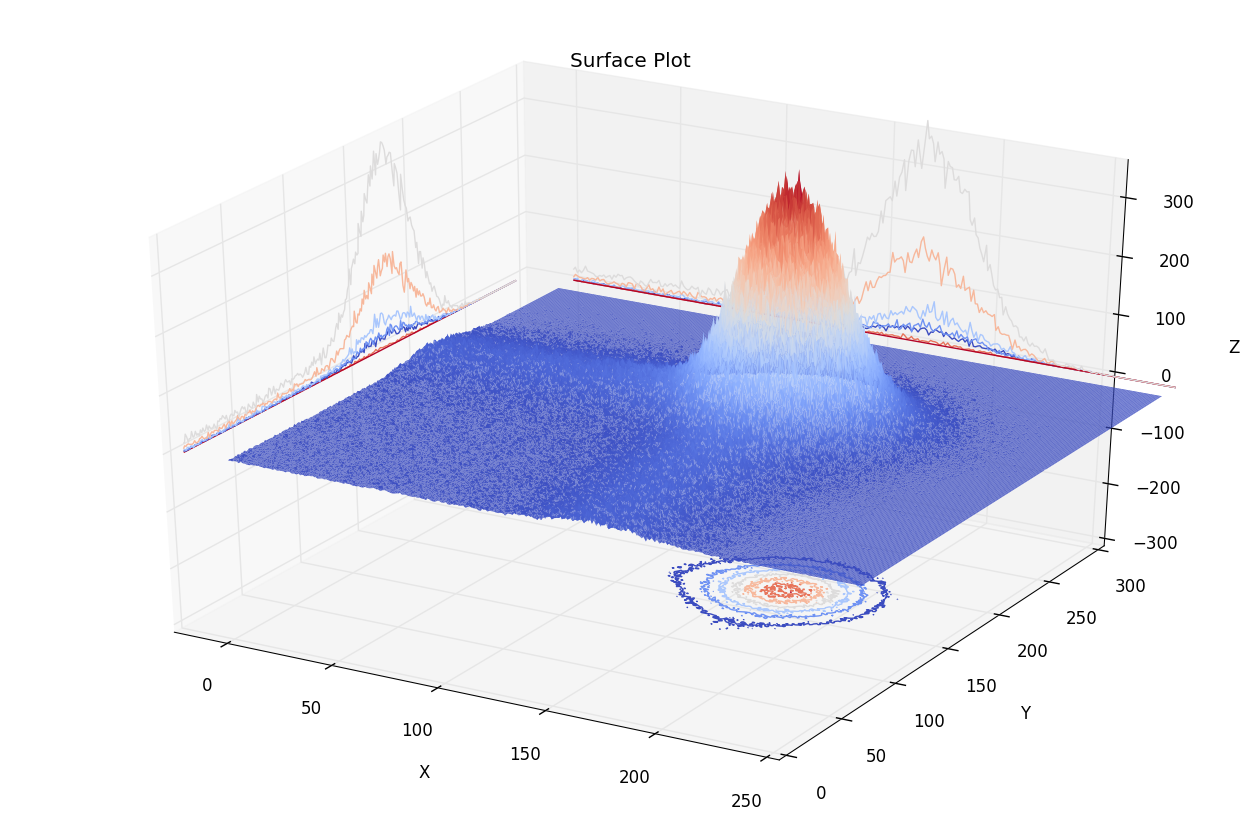

PyObject <matplotlib.text.Text object at 0x0000000044A06630>

In [80]:
maxValue=max(maximum(PTP15),maximum(PTP25))
PTP=zeros(Int16,maxValue,maxValue)
for k = 1:length(find(PTP15))
    PTP[PTP15[k],PTP25[k]]+=1
end
X=int(ceil([1:(size(PTP)[1]*size(PTP)[1])]./size(PTP)[1]))
Y=repmat(1:size(PTP)[1],size(PTP)[1])
Z=PTP[:]
xgrid=reshape(X,size(PTP))
ygrid=reshape(Y,size(PTP))

fig = figure("Surface Plot",figsize=(16,10))
ax = fig[:add_subplot](1,1,1, projection = "3d") 
ax[:plot_surface](xgrid, ygrid, PTP, rstride=1, edgecolors="k",  cstride=1, cmap=ColorMap("coolwarm"), alpha=0.9, linewidth=0) 
cset = ax[:contour](xgrid, ygrid, PTP, zdir="z", offset=-300, cmap=ColorMap("coolwarm"))
cset = ax[:contour](xgrid, ygrid, PTP, zdir="x", offset=-20, cmap=ColorMap("coolwarm"))
cset = ax[:contour](xgrid, ygrid, PTP, zdir="y", offset=300, cmap=ColorMap("coolwarm"))
xlabel("X") 
ylabel("Y")
zlabel("Z")
PyPlot.xlim(-20,250)
PyPlot.ylim(0,300)
PyPlot.zlim(-300,350)
title("DistribuciÃ³n bivariable PTP")

In [ ]:
"""
This was compared with the python solution... not really useful anymore.
"""

set_default_plot_size(24cm, 16cm)
plot(

layer(x=1:length(Dpython), 
y=Dpython, Geom.smooth(method=:loess,smoothing=0.3), 
Theme(default_color=color("red"))),

layer(x=1:length(D111), 
y=D111, Geom.smooth(method=:loess,smoothing=0.3), 
Theme(default_color=color("blue"))))

In [ ]:
"""
When we were using direct representation for D, we needed this function to convert it to linear representation
in order to be able to plot.

Other plotting routines follow below.
"""

function directtolinear(Vec)
    direct = zeros(Int16, maximum(Vec))
    Vec2 = Vec[find(Vec)]
    for i = 1:length(Vec2)
        direct[Vec2[i]] += 1
    end
    return direct
end

function plotvector(Vec)
    Vecd = directtolinear(Vec)
    a = Vecd[find(Vecd)]
    return plot(x=1:length(a),y=a)
end

function plotsmooth (V)
    
a=hist(V[find(V)],1000)[2];
b=((1:length(a)).*a;)./sum(a);

set_default_plot_size(24cm, 16cm)

plot(

layer(x=1:length(b), y=b, 
Geom.point,
Theme(default_point_size=0.6mm,default_color=color("black"))),

layer(x=1:length(b), y=b, 
Geom.smooth(method=:loess,smoothing=0.25), 
Theme(default_color=color("red")))

)
    
end

In [26]:
"""
In this section we analyze how the value of f affect the average properties (mainly Mn, Mw and Conversion)
"""

function Mn(Vec)
    #aux=directtolinear(Vec) - removed because new MCRAFT version returns direct representation for D
    aux = Vec
    Mnum=0.0
    for i = 1:length(aux)
        Mnum+=aux[i]*i*104.14
    end
    return Mnum/sum(aux)
end

function Mw(Vec)
    #aux=directtolinear(Vec) - removed because new MCRAFT version returns direct representation for D
    aux = Vec
    Mwe=0.0
    denom = 0.0
    for i = 1:length(aux)
        Mwe+=aux[i]*(i*104.14)^2
        denom+=aux[i]*i*104.14
    end
    return Mwe/denom
end

Mw (generic function with 1 method)

In [27]:
using DataFrames

In [28]:
MN=DataFrame(f=F,
    rep1=zeros(length(F)),
    rep2=zeros(length(F)),
    rep3=zeros(length(F)),
    rep4=zeros(length(F)),
    rep5=zeros(length(F)),
    rep6=zeros(length(F)));

In [29]:
MW=DataFrame(f=F,
    rep1=zeros(length(F)),
    rep2=zeros(length(F)),
    rep3=zeros(length(F)),
    rep4=zeros(length(F)),
    rep5=zeros(length(F)),
    rep6=zeros(length(F)));

In [30]:
CONV=DataFrame(f=F,
    rep1=zeros(length(F)),
    rep2=zeros(length(F)),
    rep3=zeros(length(F)),
    rep4=zeros(length(F)),
    rep5=zeros(length(F)),
    rep6=zeros(length(F)));

In [70]:
tic()
for i = 1:6
    for j = 2:7 #1 doesn't go because its the first column of the DataFrame (f values are given)

        D,PTP1,PTP2,TP,RTP,R,X,iter=MCRAFTd(F[i],34)
      
        MN[i,j] = Mn(D)
        MW[i,j] = Mw(D)
        CONV[i,j] = X
    end
end
toc()

elapsed time: 5937.35143764 seconds


5937.35143764

In [71]:
MN

,f,rep1,rep2,rep3,rep4,rep5,rep6
1,1.0e-18,15579.344000000001,15621.000000000002,15811.595849056604,14321.045517241377,13735.632083333336,15522.066999999995
2,1.0e-17,15044.758666666665,15818.866000000007,14662.548720930237,14616.643087248323,15460.70607843137,14457.60742857143
3,1.0e-16,14964.77395777723,14760.24635964912,14525.468447898946,15054.645064649912,15295.697459943449,15134.64107238606
4,2.0e-16,15016.90408579216,14862.4084249171,14823.78904733229,14954.689853658549,14853.433825801909,14946.764997632572
5,5.0e-16,14877.035898212089,15028.04030984556,14879.441716505196,14963.319502282,14985.052262273206,14940.878666982695
6,1.0e-15,14951.594818920377,14877.070069513402,14963.985253133284,14956.698093898296,14920.23398347421,15026.721056147846
7,5.0e-15,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0e-14,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
MW

,f,rep1,rep2,rep3,rep4,rep5,rep6
1,1.0e-18,18399.922994652406,21426.51231895425,20745.213423636134,18938.51705616851,17686.24868425209,18386.49167393493
2,1.0e-17,19640.842445777573,20736.856261842735,19324.534384936193,19306.89934649899,20241.38294921746,19792.061363542824
3,1.0e-16,19848.651529766215,19530.84766859386,19223.36697812764,19883.800824830658,19990.96679134923,19942.404120022533
4,2.0e-16,19789.938495813534,19495.37110573393,19535.64458335767,19720.58040673652,19647.502858083273,19926.171330938854
5,5.0e-16,19673.186833283442,19848.259496177783,19672.63418972839,19786.660029958584,19877.587547916828,19772.96650815039
6,1.0e-15,19728.039999462206,19671.21044891301,19843.374344091066,19786.67576239962,19752.47600928324,19871.371577885162
7,5.0e-15,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0e-14,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
CONV

,f,rep1,rep2,rep3,rep4,rep5,rep6
1,1.0e-18,50.16897647680061,50.0891709591607,50.96819403069341,47.336461789330706,45.54550375780038,47.689093910138254
2,1.0e-17,47.63175785731249,48.4120583145352,47.157205763570694,48.120706822280404,47.615760226702065,48.00708943784751
3,1.0e-16,47.59758088599565,47.631957026692355,47.33551665615164,47.71586238821955,47.89143911881001,47.763405604728035
4,2.0e-16,47.84211281581242,47.66832830467408,47.54586241090251,47.7092730384281,47.73191780509964,47.79642276052748
5,5.0e-16,47.74790743293109,47.64898655036427,47.70565263377888,47.738837238281896,47.645084151506445,47.76408559682342
6,1.0e-15,47.70322557452899,47.56631335925463,47.690538593687684,47.77769522354134,47.76896988957842,47.81971515608168
7,5.0e-15,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0e-14,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
"""
I'm not sure if this section is 0.4 ready yet... 
Everything from this point down, needs to be redone.
Make sure to make a single function for simulation and plotting the MWDw with the error ribbons, and another just for plotting.
"""
tic()
D3RUNS = zeros(Int64,1000,6)
for i = 1:6
    TP,PTP1,PTP2,RTP,D,R = initialize_arrays()
    D,PTP13,PTP23,TP3,RTP3,R3,X3,maxlong3=MCRAFTd(F[3],34,TP,PTP1,PTP2,RTP,D,R);
    
    D3RUNS[:,i] = D
end
toc()

elapsed time: 281.089365051 seconds


281.089365051

In [34]:
n=size(D3RUNS)[2]
aux1=aux2=0
for i = 1:n
    aux1=[removezeros(D3RUNS[:,i]) for i=1:n] #this used to be directtolinear (now its removezeros)
    aux2=[length(aux1[i])for i=1:n]
end
D3RUNSnz = zeros(Int16,maximum(aux2),n)
for i = 1:n
    while length(aux1[i]) < maximum(aux2)
        push!(aux1[i],0)
    end
end
for i = 1:n
    D3RUNSnz[:,i]=aux1[i]
end

In [67]:
using DataFrames
D3mean = squeeze(mean(D3RUNSnz,2),2)
D3max = squeeze(maximum(D3RUNSnz,2),2)
D3min = squeeze(minimum(D3RUNSnz,2),2)

df = DataFrame(x=1:length(D3mean), y=D3mean, ymin=D3min, ymax=D3max);

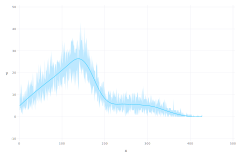

In [36]:
plot(df, x=:x, y=:y, ymin=:ymin, ymax=:ymax, Geom.smooth(method=:loess,smoothing=0.3), Geom.ribbon)

In [37]:
function plotwithribbon(RUNS) #RUNS es el vector directo de corridas, cada columna es una corrida
    
    #primero convierto todas las corridas al vector ordenado y sin ceros
    n=size(RUNS)[2]
    aux1=aux2=0
    for i = 1:n
        aux1=[removezeros(RUNS[:,i]) for i=1:n] #antes directtolinear
        aux2=[length(aux1[i])for i=1:n]
    end
    RUNSnz = zeros(Int16,maximum(aux2),n)
    for i = 1:n
        while length(aux1[i]) < maximum(aux2)
            push!(aux1[i],0)
        end
    end
    for i = 1:n
        RUNSnz[:,i]=aux1[i]
    end
    
    #segundo obtengo el promedio, maximo y minimo 
    #squeeze() es para convertir la matrix nx1 en vector unidimensional
    D3mean = squeeze(mean(RUNSnz,2),2)
    D3max = float64(squeeze(maximum(RUNSnz,2),2))
    D3min = float64(squeeze(minimum(RUNSnz,2),2))
    
    #convierto estos valores a MWDw
    D3mean2 = ((1:length(D3mean)).*D3mean;)./sum(D3mean)
    D3max2 = ((1:length(D3max)).*D3max;)./sum(D3max);
    D3min2 = ((1:length(D3min)).*D3min;)./sum(D3min);
    
    #creo el dataframe para tener mas ordenado los datos y grafico
    df = DataFrames.DataFrame(x=1:length(D3mean2), y=D3mean, ymin=D3min, ymax=D3max)
        
    Gadfly.plot(df, x=:x, y=:y, ymin=:ymin, ymax=:ymax, Gadfly.Geom.smooth(method=:loess,smoothing=0.3), Gadfly.Geom.ribbon)
    
end


    

plotwithribbon (generic function with 1 method)

In [38]:
function plotwithribbonMWDn(RUNS) #RUNS es el vector directo de corridas, cada columna es una corrida
    
    #primero convierto todas las corridas al vector ordenado y sin ceros
    n=size(RUNS)[2]
    aux1=aux2=0
    for i = 1:n
        aux1=[removezeros(RUNS[:,i]) for i=1:n] #antes directtolinear
        aux2=[length(aux1[i])for i=1:n]
    end
    RUNSnz = zeros(Int16,maximum(aux2),n)
    for i = 1:n
        while length(aux1[i]) < maximum(aux2)
            push!(aux1[i],0)
        end
    end
    for i = 1:n
        RUNSnz[:,i]=aux1[i]
    end
    
    #segundo obtengo el promedio, maximo y minimo 
    #squeeze() es para convertir la matrix nx1 en vector unidimensional
    RUNSnz2 = zeros(Float64,maximum(aux2),n)
    for i = 1:n
        RUNSnz2[:,i] = RUNSnz[:,i]/sum(RUNSnz[:,i])
    end
    
    D3mean = squeeze(mean(RUNSnz2,2),2)
    D3max = float64(squeeze(maximum(RUNSnz2,2),2))
    D3min = float64(squeeze(minimum(RUNSnz2,2),2))
      
    #creo el dataframe para tener mas ordenado los datos y grafico
    df = DataFrames.DataFrame(x=1:length(D3mean), y=D3mean, ymin=D3min, ymax=D3max)
        
    Gadfly.plot(df, x=:x, y=:y, ymin=:ymin, ymax=:ymax, Gadfly.Geom.smooth(method=:loess,smoothing=0.3), Gadfly.Geom.ribbon)
    
end

plotwithribbonMWDn (generic function with 1 method)

In [64]:
function plotwithribbonMWDw(RUNS) #RUNS es el vector directo de corridas, cada columna es una corrida
    
    #primero convierto todas las corridas al vector ordenado y sin ceros
    n=size(RUNS)[2]
    aux1=aux2=0
    for i = 1:n
        aux1=[removezeros(RUNS[:,i]) for i=1:n] #antes directtolinear
        aux2=[length(aux1[i])for i=1:n]
    end
    RUNSnz = zeros(Int16,maximum(aux2),n)
    for i = 1:n
        while length(aux1[i]) < maximum(aux2)
            push!(aux1[i],0)
        end
    end
    for i = 1:n
        RUNSnz[:,i]=aux1[i]
    end
    
    #segundo obtengo el promedio, maximo y minimo 
    #squeeze() es para convertir la matrix nx1 en vector unidimensional
    
    RUNSnz2 = zeros(Float64,maximum(aux2),n)
    for i = 1:n
        RUNSnz2[:,i] = ((1:length(RUNSnz[:,i])).*RUNSnz[:,i])/sum([1:length(RUNSnz[:,i])].*RUNSnz[:,i])
    end
    
    D3mean = squeeze(mean(RUNSnz2,2),2)
    D3max = float64(squeeze(maximum(RUNSnz2,2),2))
    D3min = float64(squeeze(minimum(RUNSnz2,2),2))
      
    #creo el dataframe para tener mas ordenado los datos y grafico
    df = DataFrames.DataFrame(x=1:length(D3mean), y=D3mean, ymin=D3min, ymax=D3max)
        
    Gadfly.plot(df, x=:x, y=:y, ymin=:ymin, ymax=:ymax, Gadfly.Geom.smooth(method=:loess,smoothing=0.3), Gadfly.Geom.ribbon,Guide.xticks(ticks=[0:50:400]),Guide.yticks(ticks=[0:0.005:0.015]))
    
end

plotwithribbonMWDw (generic function with 1 method)

In [44]:
function getloess (x,y,smoothfactor)
        x=float64([1:length(y)]);
        y=squeeze(y,2);
        model=Loess.loess(x,y,span=smoothfactor);
        us = Loess.collect(minimum(x):0.1:maximum(x))
        vs = Loess.predict(model, us)
    return us,vs
end
    
function plotwithribbonMWDw_smoothed(RUNS) #RUNS es el vector directo de corridas, cada columna es una corrida
    
    #primero convierto todas las corridas al vector ordenado y sin ceros
    n=size(RUNS)[2]
    aux1=aux2=0
    for i = 1:n
        aux1=[removezeros(RUNS[:,i]) for i=1:n] #antes directtolinear
        aux2=[length(aux1[i])for i=1:n]
    end
    RUNSnz = zeros(Int16,maximum(aux2),n)
    for i = 1:n
        while length(aux1[i]) < maximum(aux2)
            push!(aux1[i],0)
        end
    end
    for i = 1:n
        RUNSnz[:,i]=aux1[i]
    end
    
    #segundo obtengo el promedio, maximo y minimo 
    #squeeze() es para convertir la matrix nx1 en vector unidimensional
    RUNSnz2 = zeros(Float64,maximum(aux2),n)
    for i = 1:n
        RUNSnz2[:,i] = ((1:length(RUNSnz[:,i])).*RUNSnz[:,i])/sum(RUNSnz[:,i])
    end
    
    D3mean = squeeze(mean(RUNSnz2,2),2)
    D3max = float64(squeeze(maximum(RUNSnz2,2),2))
    D3min = float64(squeeze(minimum(RUNSnz2,2),2))
    
    upper = getloess(1:length(D3max),D3max,0.1)
    lower = getloess(1:length(D3min),D3min,0.1)
      
    #creo el dataframe para tener mas ordenado los datos y grafico
    df = DataFrames.DataFrame(x=1:length(D3mean), y=D3mean, ymin=D3min, ymax=D3max)
        
    Gadfly.plot(
    
    Gadfly.layer(df, x=:x, y=:y, Gadfly.Geom.smooth(method=:loess,smoothing=0.1)),
    Gadfly.layer(x=upper[1],y=df[:y],ymin=lower[2],ymax=upper[2],Gadfly.Geom.ribbon)
    
    )
    
end

plotwithribbonMWDw_smoothed (generic function with 1 method)

In [ ]:
plotwithribbonMWDw_smoothed(D3RUNS) #f=1.0e-16, 6 runs

In [ ]:
plotwithribbonMWDw_smoothed(D3RUNS) #f=2.0e-16, 10 runs

In [ ]:
plotwithribbonMWDw_smoothed(D3RUNS) #f=100e-16, 6 runs

In [ ]:
plotwithribbonMWDw(D3RUNS) #2

In [ ]:
plotwithribbonMWDw(D3RUNS) #3

In [ ]:
tic()
D3RUNS = zeros(Int64,10000,6)
for i = 1:6
    D,PTP1,PTP2,TP,RTP,R,X=MCRAFTd(1e-15,34)
    
    D3RUNS[:,i] = D
end
toc()
plotwithribbonMWDw(D3RUNS) #4

In [ ]:
tic()
D3RUNS = zeros(Int64,10000,6)
for i = 1:6
    D,PTP1,PTP2,TP,RTP,R,X=MCRAFTd(5e-15,34)
    
    D3RUNS[:,i] = D
end
toc()
plotwithribbonMWDw(D3RUNS)

In [23]:
    n=size(D3RUNS)[2]
    aux1=aux2=0
    for i = 1:n
        aux1=[directtolinear(D3RUNS[:,i]) for i=1:n]
        aux2=[length(aux1[i])for i=1:n]
    end
    RUNSnz = zeros(Int16,maximum(aux2),n)
    for i = 1:n
        while length(aux1[i]) < maximum(aux2)
            push!(aux1[i],0)
        end
    end
    for i = 1:n
        RUNSnz[:,i]=aux1[i]
    end

In [24]:
writetable("RUNSnz_6_6corridas.csv",convert(DataFrame,RUNSnz))

In [ ]:
plotwithribbonMWDn(D3RUNS) #4

In [ ]:
plotwithribbonMWDw(D3RUNS) #4

In [68]:
RUNSnz2 = zeros(Float64,maximum(aux2),n)
    for i = 1:n
        RUNSnz2[:,i] = RUNSnz[:,i]/sum(RUNSnz[:,i])
    end

In [11]:
"""
Sample values for testing.
"""

#D1=[0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	1	0	0	1	0	0	1	0	0	0	0	0	0	0	0	1	1	0	0	0	0	0	1	0	0	0	0	0	0	0	1	0	0	0	0	0	0	1	0	0	0	0	1	0	0	0	0	0	2	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	1	0	0	0	1	1	0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	1	1	1	0	0	1	0	0	1	0	1	1	0	0	0	0	0	0	1	0	0	0	0	0	0	1	0	0	0	1	1	1	0	0	2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	1	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	1]
#D2=[0	0	2	3	3	0	1	0	1	2	0	1	2	4	1	2	1	2	0	2	2	1	1	4	0	0	1	1	2	1	0	1	2	3	0	0	1	3	1	1	1	2	1	3	1	1	2	3	6	1	1	1	0	2	2	1	2	0	1	2	3	1	2	3	3	1	1	1	2	0	1	2	0	2	4	1	2	1	3	1	0	4	3	2	1	1	0	1	1	1	2	0	0	3	0	4	1	2	2	1	2	5	2	4	3	1	3	1	0	0	1	4	1	4	0	2	1	3	2	3	4	4	4	5	2	2	2	0	2	2	1	2	3	8	3	2	3	2	4	4	4	2	1	1	6	4	3	1	0	2	1	1	3	2	1	4	1	0	2	3	3	5	2	4	4	1	1	0	1	2	4	2	4	0	2	2	1	1	0	0	0	2	0	2	1	0	1	3	1	2	2	1	0	3	0	1	0	2	0	0	1	1	0	1	0	0	1	0	1	1	0	1	2	2	0	0	0	0	1	2	0	0	1	0	0	0	2	0	1	1	0	0	1	3	0	1	1	0	0	0	0	0	0	0	1	0	1	0	1	1	1	1	0	0	2	0	1	1	0	0	0	0	0	2	1	1	3	1	1	1	0	0	0	0	1	1	1	0	0	1	0	2	0	0	1	1	0	1	0	0	0	1	0	0	3	2	0	0	0	0	1	0	2	2	2	1	0	0	1	0	0	1	1	0	0	1	0	0	1	0	1	0	0	0	1	0	0	0	1	0	0	0	1	1	0	0	0	0	0	0	0	2	1	0	1	1	0	1	0	1	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	1]
#D3=[7	4	5	3	5	6	5	10	8	9	6	3	8	4	3	9	10	13	7	8	8	6	6	6	12	16	9	10	10	11	15	13	12	14	2	12	9	10	14	9	14	12	14	14	19	18	24	13	16	15	15	16	13	16	10	18	16	8	9	19	21	10	11	21	8	10	20	13	28	17	29	16	20	18	17	15	29	14	15	23	23	15	16	7	21	24	16	19	24	16	25	15	27	17	28	16	29	25	18	25	14	21	17	19	19	18	24	20	22	21	21	21	21	20	28	25	19	20	25	24	22	14	35	21	28	43	19	22	32	35	17	33	31	19	26	24	19	20	24	21	26	33	26	24	26	28	22	30	19	18	25	16	21	27	27	15	20	23	24	17	30	21	21	15	14	18	18	19	19	15	23	17	18	17	11	12	11	18	9	20	19	10	17	8	13	12	14	6	14	9	12	8	7	11	8	8	6	4	9	12	8	11	5	4	4	8	6	6	6	7	9	10	8	7	6	8	8	8	5	9	2	7	3	2	6	4	5	10	3	5	7	13	11	10	7	6	12	7	7	9	5	5	7	6	5	4	8	5	5	5	6	4	5	5	9	4	6	9	9	9	5	4	3	4	2	10	8	2	4	4	9	6	9	5	9	2	5	5	5	5	6	4	5	4	9	3	7	10	9	3	4	7	6	4	7	3	8	5	3	14	6	7	11	7	3	5	7	6	5	6	4	3	5	4	8	4	6	6	4	2	7	8	3	4	5	5	3	2	2	2	4	6	2	0	6	3	3	3	1	2	6	2	5	3	2	3	6	1	3	1	2	3	2	4	4	1	1	4	0	2	3	0	4	1	3	3	6	2	1	1	1	2	0	6	0	0	2	0	1	2	1	0	0	1	0	0	2	0	0	0	0	0	0	1	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1]
#D4=[6	9	7	9	15	10	13	12	11	20	7	9	16	12	9	13	19	10	21	28	11	16	17	15	19	21	24	16	19	31	23	26	33	24	22	22	25	24	31	29	32	29	29	20	27	21	30	36	25	23	22	32	32	29	22	19	26	24	28	33	35	26	28	31	42	26	35	37	37	28	41	32	28	31	35	30	32	45	31	27	30	34	30	38	37	43	41	37	32	48	41	30	40	38	44	40	31	42	39	36	38	36	41	49	46	37	42	43	34	40	40	47	49	59	43	42	57	41	52	56	52	47	48	57	40	44	43	53	57	60	49	48	52	41	57	61	46	62	52	48	52	57	48	62	48	66	44	42	43	42	44	45	44	57	44	57	55	46	50	37	36	39	30	39	35	34	34	38	26	35	39	39	29	36	38	48	30	27	17	25	20	26	22	26	25	24	27	24	22	20	18	21	12	25	17	16	20	10	17	21	14	20	15	11	15	11	11	18	13	10	12	9	10	15	13	12	10	17	16	11	16	6	9	10	9	15	11	11	13	11	11	13	11	12	9	20	6	8	12	11	13	5	10	16	13	10	9	15	8	14	11	16	8	11	16	6	8	13	11	10	17	10	10	14	12	12	9	15	12	13	12	4	12	15	9	10	10	11	17	13	10	11	8	14	13	7	8	11	12	9	21	8	12	8	12	13	8	11	11	13	9	10	10	10	4	17	6	17	15	11	8	11	15	10	11	12	7	10	7	8	9	9	7	8	8	9	4	5	7	8	5	6	9	8	6	7	6	8	2	11	8	8	6	1	10	7	3	7	7	5	2	6	6	5	6	6	4	4	3	3	2	3	3	8	1	5	4	4	1	2	2	3	1	1	0	1	1	1	2	0	1	2	1	1	0	0	1	3	2	1	0	0	0	1	2	1	3	1	0	1	0	0	0	0	0	0	0	0	1	0	1]
#D5=[16	30	27	17	26	23	30	38	34	27	35	47	47	30	35	42	41	42	35	56	37	57	47	43	48	50	46	47	41	41	48	60	49	52	53	62	75	62	59	48	57	61	62	48	67	72	60	60	62	69	59	80	71	80	67	66	66	75	72	81	76	67	85	79	76	79	77	95	84	73	91	88	90	78	79	79	93	94	84	80	107	90	112	95	84	113	98	90	84	86	87	115	109	100	88	109	97	93	91	119	106	92	106	107	113	128	115	99	110	103	123	97	129	127	111	127	113	108	117	124	122	115	129	107	125	105	102	119	134	123	146	114	107	132	125	127	117	117	143	131	154	132	119	151	156	133	125	118	118	128	121	146	120	122	111	113	109	122	98	113	106	135	89	128	104	90	109	110	105	100	73	80	82	100	77	69	79	68	71	68	59	59	65	61	57	52	42	43	57	62	54	46	38	46	45	45	38	47	45	42	33	31	52	37	37	36	31	25	42	27	40	26	29	35	34	20	17	28	34	30	35	33	35	32	19	30	31	29	32	27	32	33	25	27	26	25	21	26	35	34	28	24	38	38	32	21	30	23	25	20	26	35	27	25	22	34	14	26	30	21	25	29	31	27	26	27	29	25	23	23	34	33	19	28	31	32	31	24	25	32	21	27	31	27	20	26	37	30	26	23	31	16	24	28	31	31	30	31	25	27	23	29	24	37	30	22	35	26	18	10	30	21	27	24	37	23	16	27	27	27	30	16	15	17	23	21	17	26	23	18	16	17	19	21	11	18	17	10	17	17	22	13	18	10	16	15	14	15	20	15	15	10	10	9	10	8	14	9	9	6	8	9	9	8	6	2	7	10	0	4	9	4	4	5	5	2	3	0	3	3	2	3	3	1	1	3	2	0	1	3	3	3	3	1	1	1	0	0	1	0	2	1	3	0	2	0	0	0	0	0	2	1	0	3	0	0	0	1	0	0	0	0	0	0	1	0	0	0	0	0	0	0	1]
D6=[39	46	46	60	70	72	58	66	50	63	77	68	74	74	75	85	67	78	91	83	96	85	99	101	112	87	109	107	110	99	109	110	109	107	98	114	121	104	136	117	131	121	120	128	134	143	116	104	138	147	133	144	137	141	146	142	138	141	160	159	173	137	140	136	142	152	152	167	171	184	152	169	155	170	180	188	158	178	161	177	170	174	190	168	195	186	210	191	185	208	190	217	199	198	207	219	180	199	232	207	249	192	192	215	219	217	205	216	225	221	218	214	227	227	211	250	229	233	238	219	214	231	230	255	253	244	265	240	258	263	233	231	281	260	253	249	262	255	280	251	226	272	278	254	244	259	242	273	266	237	249	211	237	223	232	238	272	231	233	222	213	233	218	204	210	196	208	190	205	171	161	167	186	160	152	147	145	137	151	123	146	136	140	98	120	112	108	128	99	103	115	87	94	108	75	82	83	76	83	56	78	83	73	69	63	51	78	73	61	78	71	70	70	66	59	62	80	63	68	65	57	76	41	45	45	61	56	56	52	54	65	47	58	57	54	59	73	57	68	58	71	46	53	45	62	74	51	58	54	64	56	68	42	61	57	60	59	59	55	65	58	46	49	62	55	62	55	53	59	60	42	55	55	47	55	52	48	65	56	53	58	52	53	59	54	56	51	62	63	54	59	59	64	63	50	46	44	51	40	57	58	58	47	41	45	58	58	44	59	49	42	45	53	57	56	46	46	52	39	52	40	40	50	42	50	41	53	48	38	41	37	28	33	24	38	35	38	36	31	35	39	25	43	31	28	34	29	21	25	28	26	23	20	20	22	23	25	16	20	20	19	19	18	14	10	10	11	18	12	12	10	12	10	12	11	4	2	9	6	3	7	7	6	7	5	6	3	6	7	4	4	4	4	3	2	1	1	1	2	1	3	1	6	0	3	2	3	1	2	2	1	3	0	1	0	1]
D7=[206	233	242	270	273	293	314	318	371	346	341	343	363	384	408	428	421	433	458	444	451	440	452	482	457	442	517	509	499	508	511	539	486	539	596	533	543	614	562	573	616	565	644	607	625	609	633	619	667	650	631	733	711	711	733	702	675	714	778	766	770	761	801	751	791	776	811	828	775	854	856	784	912	860	889	842	853	912	839	914	841	877	932	906	868	990	925	965	976	935	1001	1008	1060	987	991	1066	1014	1061	1028	1069	1020	1031	1030	1028	1054	1110	1131	1082	1151	1172	1141	1160	1177	1208	1201	1217	1262	1211	1241	1208	1213	1160	1214	1225	1252	1243	1297	1228	1311	1309	1292	1260	1296	1310	1279	1275	1321	1367	1244	1243	1294	1404	1302	1304	1325	1281	1267	1258	1227	1282	1241	1146	1292	1195	1178	1214	1185	1146	1166	1130	1127	1068	1105	1080	1063	1005	1059	977	931	929	863	905	860	825	799	781	733	754	706	667	666	650	665	654	605	595	536	548	550	516	502	452	476	452	486	409	422	387	428	416	347	393	403	404	353	318	335	326	336	303	331	296	312	307	317	280	283	286	288	306	277	263	311	266	272	280	314	302	301	280	268	292	283	244	268	292	280	276	251	264	294	279	303	270	267	271	289	290	331	313	305	307	281	295	288	266	287	268	309	261	254	293	278	277	276	281	315	258	309	278	262	315	285	267	274	280	281	276	280	312	274	275	268	298	260	245	274	286	271	271	307	266	270	246	263	268	284	280	281	265	235	283	277	291	257	268	252	241	265	267	246	245	235	224	240	231	239	227	251	257	218	209	213	200	211	192	206	216	206	216	173	184	196	192	144	180	164	151	190	143	148	170	169	157	139	131	122	134	141	107	105	124	102	92	100	110	102	80	93	86	84	90	73	63	66	69	62	59	65	48	56	45	43	32	36	50	40	41	46	35	35	22	23	23	18	21	13	13	25	16	18	14	22	16	12	6	20	15	14	15	12	7	6	9	11	7	11	4	10	4	3	4	2	3	4	3	1	2	1	2	2	2	1	2	0	0	1	4	1	1	0	0	0	1	0	0	1	0	1	2	0	0	1	0	0	0	1	1	0	0	0	1]
D8=[447	497	529	549	533	614	564	687	666	680	652	713	781	747	777	836	833	874	857	900	922	916	929	915	958	1007	929	1002	1100	1035	1030	1047	1059	1064	1143	1122	1086	1190	1172	1191	1223	1205	1283	1292	1242	1273	1313	1306	1317	1308	1403	1424	1401	1393	1390	1419	1362	1438	1422	1457	1484	1463	1520	1506	1554	1555	1573	1628	1635	1645	1631	1556	1718	1703	1740	1693	1712	1828	1789	1812	1846	1873	1838	1808	1847	1864	1879	1873	1912	1869	1925	1970	2014	1975	1992	2027	2079	2089	1938	2126	2106	2112	2040	2226	2189	2290	2216	2253	2225	2313	2278	2301	2366	2390	2359	2365	2425	2346	2496	2414	2422	2420	2405	2470	2450	2457	2571	2547	2538	2575	2600	2574	2534	2556	2570	2615	2542	2638	2637	2483	2643	2517	2542	2603	2518	2500	2524	2545	2568	2473	2513	2458	2529	2440	2452	2338	2332	2367	2188	2246	2131	2115	2062	2086	2043	2074	2040	1993	1870	1799	1800	1775	1703	1608	1558	1532	1552	1505	1429	1440	1402	1309	1237	1224	1172	1185	1115	1145	1052	1047	963	985	960	881	930	888	896	852	751	818	744	737	714	694	680	663	688	689	670	633	621	649	627	681	592	608	630	574	599	586	618	603	563	543	574	603	648	582	590	615	567	555	561	564	582	563	563	542	571	532	548	568	577	599	568	544	543	577	576	573	553	538	575	591	563	547	518	556	569	544	547	577	575	578	545	577	595	552	572	561	584	542	616	573	576	520	568	592	550	563	575	536	609	545	583	558	559	563	544	550	542	555	545	575	583	479	525	532	497	524	536	606	529	552	535	483	499	495	498	456	515	476	480	499	472	494	476	478	445	463	464	436	442	387	433	407	383	394	385	386	379	395	358	381	364	368	325	337	315	324	309	297	311	293	270	264	255	252	246	273	236	230	224	222	193	201	205	182	163	170	165	151	149	138	135	142	122	121	107	102	110	86	80	86	87	86	83	70	75	75	63	54	56	61	60	45	59	33	41	36	44	25	37	42	24	35	22	19	23	15	20	16	13	17	12	11	7	14	11	16	9	11	11	3	9	2	9	8	2	4	3	5	2	6	1	2	3	4	0	1	2	1	2	1	2	4	1	2	1	0	1	1	1	1	1	0	0	0	0	0	0	0	0	0	0	1]
gproms=[7.86E-06	1.69E-05	2.70E-05	3.80E-05	4.98E-05	6.24E-05	7.57E-05	8.97E-05	1.04E-04	1.20E-04	1.35E-04	1.52E-04	1.69E-04	1.86E-04	2.05E-04	2.23E-04	2.42E-04	2.62E-04	2.82E-04	3.03E-04	3.24E-04	3.46E-04	3.68E-04	3.91E-04	4.14E-04	4.38E-04	4.62E-04	4.87E-04	5.12E-04	5.38E-04	5.64E-04	5.90E-04	6.18E-04	6.45E-04	6.73E-04	7.02E-04	7.31E-04	7.61E-04	7.91E-04	8.22E-04	8.53E-04	8.84E-04	9.16E-04	9.49E-04	9.82E-04	0.00101538	0.001049412	0.001083938	0.001118959	0.001154476	0.00119049	0.001227002	0.001264015	0.001301528	0.001339543	0.001378062	0.001417087	0.001456618	0.001496657	0.001537205	0.001578265	0.001619838	0.001661926	0.001704529	0.00174765	0.001791291	0.001835453	0.001880138	0.001925347	0.001971083	0.002017347	0.002064141	0.002111468	0.002159327	0.002207722	0.002256653	0.002306124	0.002356135	0.002406689	0.002457786	0.00250943	0.00256162	0.00261436	0.00266765	0.002721493	0.002775889	0.00283084	0.002886347	0.002942411	0.002999033	0.003056214	0.003113955	0.003172255	0.003231115	0.003290535	0.003350513	0.003411049	0.00347214	0.003533784	0.003595977	0.003658716	0.003721996	0.003785808	0.003850146	0.003915	0.003980358	0.004046206	0.004112529	0.004179306	0.004246517	0.004314135	0.004382131	0.00445047	0.004519115	0.00458802	0.004657137	0.004726409	0.004795773	0.004865159	0.004934491	0.005003681	0.005072637	0.005141253	0.005209419	0.005277011	0.005343898	0.005409939	0.005474983	0.005538869	0.005601425	0.005662474	0.005721828	0.00577929	0.005834659	0.005887725	0.005938274	0.005986089	0.00603095	0.006072635	0.006110926	0.006145603	0.006176452	0.006203267	0.006225847	0.006244003	0.006257558	0.006266347	0.006270221	0.006269052	0.006262727	0.006251156	0.006234271	0.006212026	0.006184402	0.006151404	0.006113064	0.006069439	0.006020613	0.005966698	0.00590783	0.005844172	0.005775911	0.005703256	0.005626441	0.005545718	0.005461359	0.005373652	0.005282902	0.005189423	0.005093543	0.004995594	0.004895918	0.004794856	0.004692752	0.004589948	0.004486782	0.004383584	0.004280679	0.004178379	0.004076986	0.003976787	0.003878055	0.003781044	0.003685995	0.003593125	0.003502637	0.003414712	0.00332951	0.003247174	0.003167824	0.003091563	0.003018471	0.002948614	0.002882035	0.002818763	0.002758808	0.002702167	0.00264882	0.002598733	0.002551863	0.002508152	0.002467534	0.002429932	0.002395264	0.002363439	0.002334361	0.002307928	0.002284036	0.002262578	0.002243445	0.002226527	0.002211712	0.00219889	0.002187954	0.002178793	0.002171305	0.002165384	0.002160932	0.002157851	0.002156047	0.002155431	0.002155917	0.002157422	0.002159868	0.002163182	0.002167292	0.002172133	0.002177642	0.00218376	0.002190433	0.002197611	0.002205243	0.002213288	0.002221702	0.002230448	0.00223949	0.002248796	0.002258336	0.00226808	0.002278004	0.002288084	0.002298297	0.002308624	0.002319046	0.002329545	0.002340106	0.002350714	0.002361354	0.002372015	0.002382683	0.002393347	0.002403997	0.002414622	0.002425212	0.002435757	0.002446248	0.002456675	0.002467029	0.002477301	0.002487481	0.00249756	0.002507528	0.002517376	0.002527093	0.002536668	0.002546092	0.002555352	0.002564437	0.002573335	0.002582033	0.002590517	0.002598774	0.00260679	0.002614548	0.002622035	0.002629233	0.002636125	0.002642694	0.002648921	0.002654788	0.002660275	0.002665361	0.002670027	0.002674251	0.00267801	0.002681283	0.002684047	0.002686278	0.002687953	0.002689049	0.002689541	0.002689405	0.002688617	0.002687153	0.002684988	0.002682098	0.00267846	0.002674051	0.002668848	0.002662829	0.002655972	0.002648257	0.002639663	0.002630174	0.00261977	0.002608436	0.002596157	0.002582921	0.002568714	0.002553527	0.002537353	0.002520184	0.002502016	0.002482848	0.002462679	0.002441512	0.00241935	0.002396201	0.002372073	0.002346977	0.002320929	0.002293943	0.002266039	0.002237237	0.00220756	0.002177034	0.002145687	0.002113549	0.002080651	0.002047029	0.002012717	0.001977754	0.00194218	0.001906035	0.001869362	0.001832205	0.001794609	0.001756621	0.001718287	0.001679656	0.001640774	0.001601692	0.001562458	0.001523122	0.001483731	0.001444335	0.001404982	0.00136572	0.001326596	0.001287656	0.001248944	0.001210505	0.001172382	0.001134616	0.001097246	0.001060311	0.001023848	9.88E-04	9.52E-04	9.18E-04	8.83E-04	8.50E-04	8.17E-04	7.84E-04	7.53E-04	7.22E-04	6.92E-04	6.62E-04	6.34E-04	6.06E-04	5.79E-04	5.52E-04	5.27E-04	5.02E-04	4.78E-04	4.55E-04	4.32E-04	4.11E-04	3.90E-04	3.70E-04	3.50E-04	3.32E-04	3.14E-04	2.97E-04	2.80E-04	2.65E-04	2.50E-04	2.35E-04	2.22E-04	2.08E-04	1.96E-04	1.84E-04	1.73E-04	1.62E-04	1.52E-04	1.42E-04	1.33E-04	1.24E-04	1.16E-04	1.09E-04	1.01E-04	9.44E-05	8.79E-05	8.18E-05	7.60E-05	7.07E-05	6.56E-05	6.08E-05	5.64E-05	5.22E-05	4.83E-05	4.47E-05	4.13E-05	3.81E-05	3.52E-05	3.24E-05	2.99E-05	2.75E-05	2.53E-05	2.32E-05	2.13E-05	1.96E-05	1.80E-05	1.65E-05	1.51E-05	1.38E-05	1.26E-05	1.15E-05	1.05E-05	9.58E-06	8.73E-06	7.95E-06	7.23E-06	6.58E-06	5.98E-06	5.43E-06	4.92E-06	4.46E-06	4.04E-06	3.66E-06	3.31E-06	2.99E-06	2.70E-06	2.44E-06	2.20E-06	1.98E-06	1.79E-06	1.61E-06	1.44E-06	1.30E-06	1.17E-06	1.05E-06	9.38E-07	8.41E-07	7.53E-07	6.74E-07	6.02E-07	5.38E-07	4.80E-07	4.29E-07	3.82E-07	3.41E-07	3.03E-07	2.70E-07	2.40E-07	2.13E-07	1.89E-07	1.68E-07	1.49E-07	1.32E-07	1.17E-07	1.03E-07	9.13E-08	8.07E-08	7.13E-08	6.29E-08	5.54E-08	4.89E-08	4.30E-08	3.79E-08	3.33E-08	2.93E-08	2.57E-08	2.26E-08	1.98E-08	1.73E-08	1.52E-08	1.33E-08	1.16E-08	1.02E-08	8.88E-09	7.75E-09	6.77E-09	5.90E-09	5.14E-09	4.48E-09	3.90E-09	3.39E-09	2.94E-09	2.56E-09]

#D1=squeeze(D1,1)
#D2=squeeze(D2,1)
#D3=squeeze(D3,1)
#D4=squeeze(D4,1)
#D5=squeeze(D5,1)
D6=squeeze(D6,1)
D7=squeeze(D7,1)
D8=squeeze(D8,1)
gproms=squeeze(gproms,1)

500-element Array{Float64,1}:
 7.86e-6 
 1.69e-5 
 2.7e-5  
 3.8e-5  
 4.98e-5 
 6.24e-5 
 7.57e-5 
 8.97e-5 
 0.000104
 0.00012 
 0.000135
 0.000152
 0.000169
 â‹®       
 1.16e-8 
 1.02e-8 
 8.88e-9 
 7.75e-9 
 6.77e-9 
 5.9e-9  
 5.14e-9 
 4.48e-9 
 3.9e-9  
 3.39e-9 
 2.94e-9 
 2.56e-9 